In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

## Parameters

In [3]:
name = "TestCNN"
epochs = 10
steps_per_epoch = 50

## Tensorboard Data Loading

In [4]:
fig_path = "CNN/" + name
path = "CNN/" + name + "/Tensorboard_Data"

tensor_files = os.listdir(path)

if tensor_files[0].find("train") != -1:
    training_file = np.genfromtxt(path + "/" + tensor_files[0], delimiter=",")
    validation_file = np.genfromtxt(path + "/" + tensor_files[1], delimiter=",")
else:
    training_file = np.genfromtxt(path + "/" + tensor_files[1], delimiter=",")
    validation_file = np.genfromtxt(path + "/" + tensor_files[0], delimiter=",")
    
train_x = np.empty([epochs * steps_per_epoch])
train_y = np.empty([epochs * steps_per_epoch])

for i in range(0, epochs * steps_per_epoch):
    row = training_file[i + 1]
    train_x[i] = row[1]
    train_y[i] = row[2]

val_x = np.empty([epochs])
val_y = np.empty([epochs])

for i in range(0, epochs):
    row = validation_file[i + 1]
    val_x[i] = row[1]
    val_y[i] = row[2]

train_x = train_x / 50

## Graphing

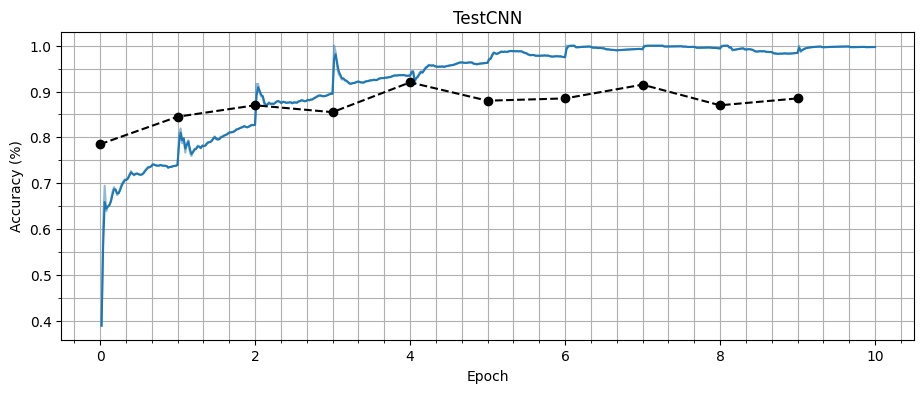

In [6]:
#Creating smoothed data
dataframe = pd.DataFrame(train_y)
smoothed_data = dataframe.ewm(com=0.4).mean()

fig, ax = plt.subplots(figsize=(11, 4))
ax.plot(train_x, train_y,alpha=0.5)
ax.plot(train_x, smoothed_data, color="#1f77b4")
ax.plot(val_x, val_y, "ko--")

ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.xaxis.set_minor_locator(MultipleLocator(0.33333))
ax.grid(True, which="both")

plt.ylabel("Accuracy (%)")
plt.xlabel("Epoch")
plt.title(name)

plt.savefig(fig_path + "/" + name + "_TrainGraph"+ ".svg")